## **1. Dataset 구성**

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns

from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import warnings
from keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')

df = DataFrame(pd.read_csv('creditcard.csv'))

In [106]:
df.info()
# df.describe()
# df.values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### * **class 값 분석**

In [107]:
print("No Frauds", round(df["Class"].value_counts()[0]/len(df) * 100,2),
     "%of the dateset")
print("Frauds", round(df["Class"].value_counts()[1]/len(df) * 100,2),
     "%of the dateset")

No Frauds 99.83 %of the dateset
Frauds 0.17 %of the dateset


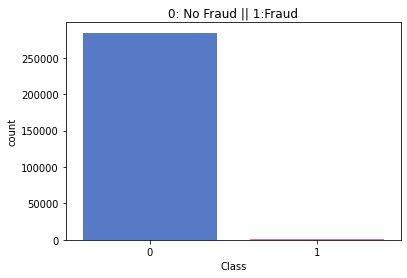

In [108]:
colors = ["#4374D9", "#F361A6"]
sns.countplot("Class", data=df, palette=colors)
plt.title("0: No Fraud || 1:Fraud")
plt.show()

In [109]:
X=df[df.columns[:-2]]
Y=df['Class']
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### * **StandardScaler Amount 값 정규화**

In [110]:
dataset = df.values
amount = dataset[:,29]
# 정규화를 위한 차원변경
amount = amount.reshape(-1,1)

In [111]:
# StandardScaler() 정규화
standardScaler = StandardScaler()
rob_scaler = RobustScaler()
amount_data_standard = standardScaler.fit(amount).transform(amount)

In [112]:
# 정규화 된 Amount data 컬럼명 normalAmount로 지정
amount_data = pd.DataFrame(amount_data_standard)
amount_data.columns = ['normalAmount']
amount_data

,normalAmount
0,0.244964
1,-0.342475
2,1.160686
3,0.140534
4,-0.073403
...,...
284802,-0.350151
284803,-0.254117
284804,-0.081839
284805,-0.313249


In [113]:
# 기존에 있던 Time, Amount 데이터 drop
df.drop('Time', axis=1, inplace = True)
df.drop('Amount', axis=1, inplace = True)
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


In [114]:
# 정규화된 Amount data 삽입
df.insert(28,'normalAmount', amount_data)
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338556,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333279,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.019392,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338516,0


### * **Class = 1, Class = 0값 비율을 위한 샘플링 추출**

In [115]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df  = df.loc[df['Class'] == 0][:492]

normal_distributed_df= pd.concat([fraud_df, non_fraud_df])

df = normal_distributed_df.sample(frac=1, random_state=42)

df.head(20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount,Class
106839,1.411190,-0.713597,0.386150,-1.007847,-0.577021,0.565564,-1.062723,0.113954,-0.433717,0.536901,...,0.332725,0.976893,-0.264513,-1.248912,0.565982,0.062935,0.055746,0.011886,-0.265311,0
72757,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,1.010291,...,-0.875146,-0.509849,1.313918,0.355065,0.448552,0.193490,1.214588,-0.013923,-0.346073,1
155713,-0.513840,0.752265,2.375663,-0.104836,0.060729,-0.274978,0.502985,-0.213632,1.615484,-1.132412,...,-0.306357,-0.467832,-0.268527,-0.136685,0.229910,-0.722749,-0.084214,-0.147139,-0.308171,0
10204,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,1.908963,1.077418,...,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,-0.307691,1
231978,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,1.724184,-0.887242,...,6.215514,-1.276909,0.459861,-1.051685,0.209178,-0.319859,0.015434,-0.050117,-0.321245,1
27895,0.861545,-1.065624,0.672919,0.570590,-1.205622,0.270839,-0.673109,0.221099,-0.896328,0.910822,...,-0.065595,-0.155664,-0.118910,-0.034928,0.180498,-0.303340,0.039835,0.054071,0.422399,0
64436,1.593954,-1.041333,-1.593685,-2.524160,1.340290,2.947308,-1.047326,0.614772,-2.322846,1.513246,...,-0.556379,-1.421794,0.113418,0.943166,0.499233,-0.434746,0.004902,0.009553,-0.280184,0
190368,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,-1.297262,-5.487425,...,0.718504,0.893850,-0.031632,0.322913,-0.058406,-0.411649,0.573803,0.176067,0.350034,1
57349,-0.334815,1.189703,1.748604,2.729949,0.291077,0.468765,0.478128,0.192521,-1.845558,0.830895,...,0.338385,0.978178,-0.151153,0.262088,-0.326833,0.330151,0.151411,0.135550,-0.277186,0
200319,2.053859,0.017620,-1.044302,0.398776,-0.017421,-1.103648,0.242713,-0.369792,0.378501,0.033398,...,-0.271011,-0.588222,0.333976,0.015987,-0.277432,0.197468,-0.060623,-0.058174,-0.345313,0


In [116]:
X=df[df.columns[:-2]]
Y=df['Class']
Y.value_counts()

0    492
1    492
Name: Class, dtype: int64

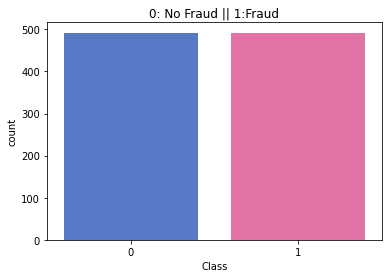

In [117]:
sns.countplot('Class', data=df, palette=colors)
plt.title("0: No Fraud || 1:Fraud")
plt.show()

----

## 3. Class를 종속변수 사용

In [118]:
np.random.seed(3)
tf.random.set_seed(3)

X = df.values[:,0:29]
Y = df.values[:,29]

## 4. Train Set : Test set = 85:15

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.15, random_state=42)

## 5. ANN/DNN활용(Time Drop)

In [120]:
model = Sequential()

model.add(Dense(30, input_dim=29, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 방법
model_path='./model/{epoch:02d}-{val_loss:.4f},hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 조기 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(X_train, Y_train, validation_split=0.15, epochs = 200, batch_size = 100, callbacks=[early_stopping_callback,checkpointer])
score = model.evaluate(X_test, Y_test, verbose = 0)

print(f'테스트 손실값 : {score[0]}, 테스트 정확도 : {score[1]}')

Epoch 1/200
8/8 [==============================] - 1s 43ms/step - loss: 3.0744 - accuracy: 0.5128 - val_loss: 2.1626 - val_accuracy: 0.4921

Epoch 00001: val_loss improved from inf to 2.16256, saving model to ./model\01-2.1626,hdf5
INFO:tensorflow:Assets written to: ./model\01-2.1626,hdf5\assets
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 1.9263 - accuracy: 0.5350 - val_loss: 1.4169 - val_accuracy: 0.4841

Epoch 00002: val_loss improved from 2.16256 to 1.41685, saving model to ./model\02-1.4169,hdf5
INFO:tensorflow:Assets written to: ./model\02-1.4169,hdf5\assets
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 1.4276 - accuracy: 0.5053 - val_loss: 0.8990 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 1.41685 to 0.89898, saving model to ./model\03-0.8990,hdf5
INFO:tensorflow:Assets written to: ./model\03-0.8990,hdf5\assets
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8392 - accuracy: 0.5490 - val_

8/8 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.9814 - val_loss: 0.1606 - val_accuracy: 0.9286

Epoch 00064: val_loss did not improve from 0.15208
Epoch 65/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0795 - accuracy: 0.9782 - val_loss: 0.1570 - val_accuracy: 0.9286

Epoch 00065: val_loss did not improve from 0.15208
Epoch 66/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9722 - val_loss: 0.1623 - val_accuracy: 0.9286

Epoch 00066: val_loss did not improve from 0.15208
Epoch 67/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9827 - val_loss: 0.1648 - val_accuracy: 0.9286

Epoch 00067: val_loss did not improve from 0.15208
Epoch 68/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0840 - accuracy: 0.9757 - val_loss: 0.1625 - val_accuracy: 0.9286

Epoch 00068: val_loss did not improve from 0.15208
Epoch 69/200
8/8 [==============================] - 0


Epoch 00106: val_loss did not improve from 0.15208
Epoch 107/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0538 - accuracy: 0.9886 - val_loss: 0.1774 - val_accuracy: 0.9286

Epoch 00107: val_loss did not improve from 0.15208
Epoch 108/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0482 - accuracy: 0.9916 - val_loss: 0.1801 - val_accuracy: 0.9286

Epoch 00108: val_loss did not improve from 0.15208
Epoch 109/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9933 - val_loss: 0.1835 - val_accuracy: 0.9286

Epoch 00109: val_loss did not improve from 0.15208
Epoch 110/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 0.9912 - val_loss: 0.1832 - val_accuracy: 0.9286

Epoch 00110: val_loss did not improve from 0.15208
Epoch 111/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9934 - val_loss: 0.1853 - val_accuracy: 0.9286

Epoch 00111: val_loss did not impr

In [126]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 30)                900       
_________________________________________________________________
dense_29 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_30 (Dense)             (None, 12)                228       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 13        
Total params: 1,699
Trainable params: 1,699
Non-trainable params: 0
_________________________________________________________________


In [127]:
history.history
# 딕셔너리 형태
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [128]:
y_value = history.history['val_loss']  # 오차값을 저장
y_acc = history.history['accuracy']    # 정밀도를 저장

print(len(y_value))
print(len(y_acc))

148
148


### * **오차,정확도 그래프**

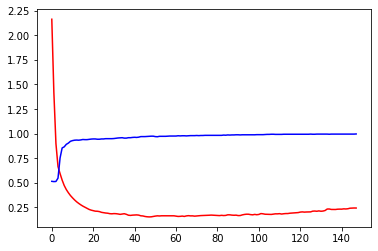

In [129]:
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_value, c='red', markersize=3)
plt.plot(x_len, y_acc, c='blue', markersize=3)
plt.show()

### * **Class=1값 정확도 검증**

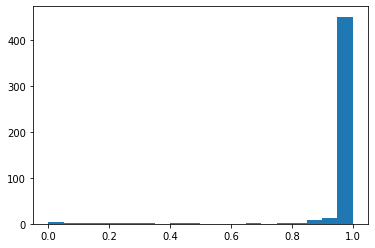

In [130]:
class_one = df["Class"] == 1
all_class_1 = df[class_one]

all_class_1.drop('Class', axis=1, inplace = True)

dt_one = pd.DataFrame(model.predict(all_class_1))
plt.hist(dt_one, bins=20)
plt.show()